In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os
import glob
%matplotlib inline

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
ariane_path = '/home/soontiensn/data/gpsc-work/OPP/C-A-C/DriftEval/ciopse_ariane_daily/output/output_per_drifter/'
od_path = '/home/soontiensn/data/gpsc-work/OPP/C-A-C/DriftEval/ciopse_od_daily/output/output_per_drifter/'
paths= {'Open Drift': od_path,
        'Ariane': ariane_path}

In [3]:
def plot_skill(job, skill, ax, paths, c):
    files = glob.glob(os.path.join(paths[job], '*.nc'))
    skills = []
    for file in files:
        ds = xr.open_dataset(file)
        s = np.nanmean(ds[skill].values/1000, axis=0)
        skills.append(s)
        timesteps = ds.timestep.values
        ax.plot(timesteps, s,'--',c=c,alpha=0.5)
    skills = np.array(skills)
    ax.plot(timesteps, np.nanmean(skills,axis=0),c=c,lw=3)

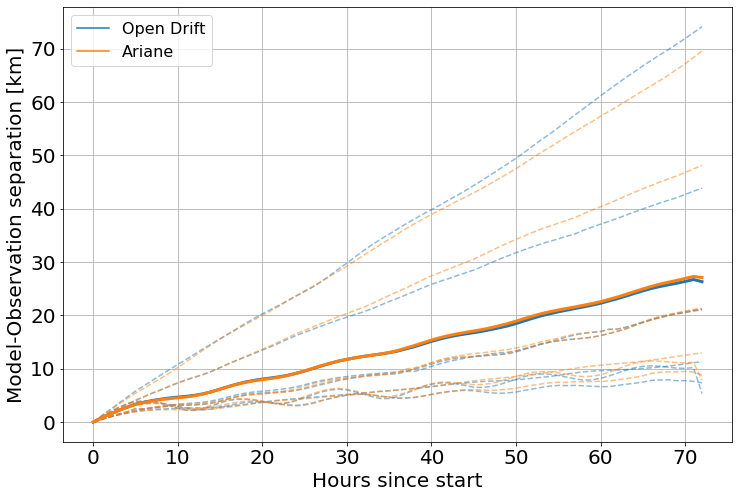

In [4]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
skill='sep'
job='Open Drift'
plot_skill(job, skill, ax, paths, 'C0')
job='Ariane'
plot_skill(job, skill, ax, paths, 'C1')

ax.set_ylabel('Model-Observation separation [km]', fontsize=20)
ax.set_xlabel('Hours since start',fontsize=20)
#fake legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='C0'),
                Line2D([0], [0], color='C1')]
ax.legend(custom_lines, ['Open Drift', 'Ariane'],fontsize=16)
ax.tick_params(axis='both', labelsize=20)
ax.grid()
fig.savefig('figures/eval-odVsariane_daily-timeseries.png', bbox_inches='tight')

In [5]:
def plot_positions(job, bmap, paths, c, obs=True):
    files = glob.glob(os.path.join(paths[job], '*.nc'))
    for file in files:
        ds = xr.open_dataset(file)
        xm, ym = bmap(ds.mod_lon.values, ds.mod_lat.values)
        xo, yo = bmap(ds.obs_lon.values, ds.obs_lat.values)
        for i in range(xm.shape[0]):
            if obs:
                bmap.plot(xo[i,:], yo[i,:],c='k')
            bmap.plot(xm[i,:], ym[i,:],c=c)


/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


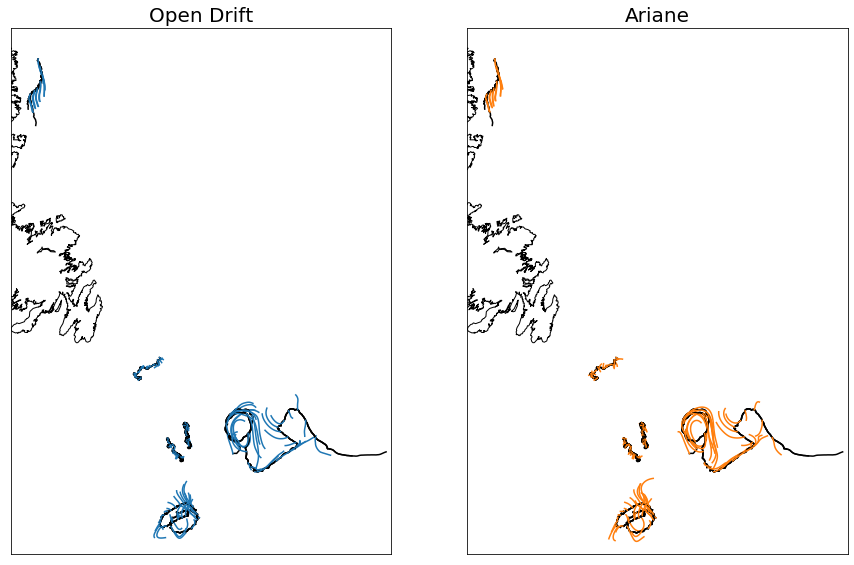

In [6]:
fig, axs = plt.subplots(1,2,figsize=(15,10))
ax=axs[0]
bmap = Basemap(projection='merc',llcrnrlat=41,urcrnrlat=54,llcrnrlon=-56,urcrnrlon=-42,resolution='i',ax=ax)
job='Open Drift'
plot_positions(job, bmap, paths, 'C0')
bmap.drawcoastlines()
ax.set_title(job,fontsize=20)
ax=axs[1]
bmap = Basemap(projection='merc',llcrnrlat=41,urcrnrlat=54,llcrnrlon=-56,urcrnrlon=-42,resolution='i',ax=ax)
job='Ariane'
plot_positions(job, bmap, paths, 'C1')
bmap.drawcoastlines()
ax.set_title(job,fontsize=20)
fig.savefig('figures/eval-odVsariane_daily-map.png', bbox_inches='tight')